## Data

CRSP data

https://crsp.org/files/ccm_files/BalanceSheetQuarterly.html

In [9]:
## Importing 
from jupyterthemes import jtplot
jtplot.style('gruvboxl')


import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Enter the path to the folder on your desktop where the CSV file is stored
folder_path = "/Users/pietrobicocchi/Desktop/project/data/CompStat"

In [3]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(f"{folder_path}/crsp_ccm_inventories_sales.csv")

In [4]:
df = df[['GVKEY', 'datadate', 'saleq', 'prccq']]

In [5]:
dfs = {}
groups = df.groupby(['GVKEY']) # group the original DataFrame by GVKEY

# create a new DataFrame for each group and store it in the dictionary
for gvkey, group_df in groups:
    dfs[gvkey] = group_df

In [6]:
xx = []
for val in dfs.values():
        xx.append(len(val))
np.array(xx).mean(),  np.median(np.array(xx))

(45.58620820524498, 30.0)

https://stackoverflow.com/questions/50459301/how-to-convert-dates-to-quarters-in-python

In [7]:
for key, df in dfs.items():

    df.datadate = pd.to_datetime(df.datadate)
    df['quarter'] = pd.PeriodIndex(df.datadate, freq='Q')
    
    # set new index
    df.set_index('quarter', inplace=True)
    df.drop('GVKEY', axis=1, inplace=True)
    df.drop('datadate', axis=1, inplace=True)

In [8]:
dfs

{1000:           saleq   prccq
 quarter                
 1970Q4   10.919  10.000
 1971Q1    7.983   9.750
 1971Q2    9.885   8.250
 1971Q3    7.975   4.625
 1971Q4    7.872   5.750
 1972Q1    8.201   5.625
 1972Q2    9.958   6.000
 1972Q3    7.911   5.250
 1972Q4    8.918   5.125
 1973Q1    8.467   4.375
 1973Q2   10.419   3.000
 1973Q3    9.281   3.000
 1973Q4   10.143   1.750
 1974Q1    9.961   2.625
 1974Q2   15.249   2.625
 1974Q3   13.718   2.125
 1974Q4   11.397   2.125
 1975Q1   11.295   3.000
 1975Q2   14.441   2.875
 1975Q3   13.122   4.000
 1975Q4   12.334   4.375
 1976Q1   16.226   6.750
 1976Q2   19.637   7.250
 1976Q3   14.733   7.125
 1976Q4   15.818   5.750
 1977Q1   18.014   6.250
 1977Q2   21.203   6.500
 1977Q3   19.359   9.000
 1977Q4   19.370   9.250
 1978Q1   18.920   8.875,
 1001:           saleq   prccq
 quarter                
 1983Q3    6.449   6.125
 1983Q4    8.166   7.250
 1984Q1    6.434   6.375
 1984Q2    7.559   5.750
 1984Q3    8.058   4.625
 1984Q4    9

In [25]:
# Fill NaN values with the mean value for each variable across all the tickers
for ticker, df in dfs.items():
    means = df.mean()  # Calculate the mean value for each variable in the DataFrame
    df.fillna(value=means, inplace=True)  # Fill NaN values with the mean value

In [26]:
# cutting off dataframe with less than 10 rows -> that died before 3 years. 
for key, df in list(dfs.items()):
    if len(df) < 12:
        del dfs[key]

In [27]:
# are there NaN values in the dataframe?

i=0
for ticker, df in dfs.items():

    if df["saleq"].isna().any().any():
        print("There are NaN values in the DataFrame ", ticker)
        i +=1 # counting invalid dataset

There are NaN values in the DataFrame  1119
There are NaN values in the DataFrame  1417
There are NaN values in the DataFrame  1419
There are NaN values in the DataFrame  1426
There are NaN values in the DataFrame  2850
There are NaN values in the DataFrame  3431
There are NaN values in the DataFrame  4652
There are NaN values in the DataFrame  4653
There are NaN values in the DataFrame  4654
There are NaN values in the DataFrame  4688
There are NaN values in the DataFrame  4745
There are NaN values in the DataFrame  5024
There are NaN values in the DataFrame  5158
There are NaN values in the DataFrame  5291
There are NaN values in the DataFrame  5457
There are NaN values in the DataFrame  5681
There are NaN values in the DataFrame  5895
There are NaN values in the DataFrame  6024
There are NaN values in the DataFrame  6581
There are NaN values in the DataFrame  6657
There are NaN values in the DataFrame  6709
There are NaN values in the DataFrame  7259
There are NaN values in the Data

There are NaN values in the DataFrame  17023
There are NaN values in the DataFrame  17034
There are NaN values in the DataFrame  17045
There are NaN values in the DataFrame  17054
There are NaN values in the DataFrame  17089
There are NaN values in the DataFrame  17102
There are NaN values in the DataFrame  17103
There are NaN values in the DataFrame  17104
There are NaN values in the DataFrame  17126
There are NaN values in the DataFrame  17153
There are NaN values in the DataFrame  17154
There are NaN values in the DataFrame  17165
There are NaN values in the DataFrame  17171
There are NaN values in the DataFrame  17191
There are NaN values in the DataFrame  17200
There are NaN values in the DataFrame  17204
There are NaN values in the DataFrame  17216
There are NaN values in the DataFrame  17249
There are NaN values in the DataFrame  17250
There are NaN values in the DataFrame  17253
There are NaN values in the DataFrame  17257
There are NaN values in the DataFrame  17280
There are 

There are NaN values in the DataFrame  25998
There are NaN values in the DataFrame  26029
There are NaN values in the DataFrame  26032
There are NaN values in the DataFrame  26041
There are NaN values in the DataFrame  26051
There are NaN values in the DataFrame  26052
There are NaN values in the DataFrame  26053
There are NaN values in the DataFrame  26054
There are NaN values in the DataFrame  26057
There are NaN values in the DataFrame  26090
There are NaN values in the DataFrame  26098
There are NaN values in the DataFrame  26099
There are NaN values in the DataFrame  26100
There are NaN values in the DataFrame  26104
There are NaN values in the DataFrame  26108
There are NaN values in the DataFrame  26109
There are NaN values in the DataFrame  26110
There are NaN values in the DataFrame  26116
There are NaN values in the DataFrame  26238
There are NaN values in the DataFrame  26930
There are NaN values in the DataFrame  26934
There are NaN values in the DataFrame  26935
There are 

There are NaN values in the DataFrame  66399
There are NaN values in the DataFrame  66577
There are NaN values in the DataFrame  66605
There are NaN values in the DataFrame  102519
There are NaN values in the DataFrame  106133
There are NaN values in the DataFrame  107496
There are NaN values in the DataFrame  109921
There are NaN values in the DataFrame  110246
There are NaN values in the DataFrame  110807
There are NaN values in the DataFrame  112000
There are NaN values in the DataFrame  112006
There are NaN values in the DataFrame  112035
There are NaN values in the DataFrame  112773
There are NaN values in the DataFrame  112875
There are NaN values in the DataFrame  115557
There are NaN values in the DataFrame  116213
There are NaN values in the DataFrame  116847
There are NaN values in the DataFrame  117821
There are NaN values in the DataFrame  117822
There are NaN values in the DataFrame  117823
There are NaN values in the DataFrame  117824
There are NaN values in the DataFrame

There are NaN values in the DataFrame  165225
There are NaN values in the DataFrame  165226
There are NaN values in the DataFrame  165403
There are NaN values in the DataFrame  165435
There are NaN values in the DataFrame  165436
There are NaN values in the DataFrame  165437
There are NaN values in the DataFrame  165438
There are NaN values in the DataFrame  165439
There are NaN values in the DataFrame  165606
There are NaN values in the DataFrame  165809
There are NaN values in the DataFrame  165919
There are NaN values in the DataFrame  166391
There are NaN values in the DataFrame  166730
There are NaN values in the DataFrame  170589
There are NaN values in the DataFrame  170966
There are NaN values in the DataFrame  171153
There are NaN values in the DataFrame  174093
There are NaN values in the DataFrame  174095
There are NaN values in the DataFrame  174359
There are NaN values in the DataFrame  174360
There are NaN values in the DataFrame  174926
There are NaN values in the DataFr

In [28]:
# delete the invalid dataframes from dfs
to_del = {}
for ticker, df in dfs.items():
    if df["saleq"].isna().any().any():
        to_del[ticker] = "yes"

for key in to_del.keys():
    dfs.pop(key)

https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas#:~:text=To%20remove%20both%20Nan%20%2C%20and,%2C%20%2Dnp.inf%5D).

In [29]:
# Returns and log-returns and rescaled log
for ticker, df in dfs.items():
    df['ret'] = df['saleq'].diff(4)
    df['log_ret'] = np.log(df['saleq']).diff(4)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop the first 4 rows and compute the rescaled log returns
for ticker, df in dfs.items():
    df.drop(df.index[[0, 1, 2, 3]], axis=0, inplace=True)
    df['resc_log_ret'] = ( df['log_ret'] - df['log_ret'].mean() )/df['log_ret'].std()

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicoc

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobico

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobico

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicoc

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobico

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobi

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pietrobic

Note that we are using the list() function to convert the dictionary items into a list before iterating over them. This is because we are modifying the dictionary in place, and it is not safe to modify the dictionary size while iterating over it. Converting it to a list first avoids this issue.

In [30]:
dfs

{1000:           saleq  prccq    ret   log_ret  resc_log_ret
 quarter                                              
 1971Q4    7.872  5.750 -3.047 -0.327192     -2.871411
 1972Q1    8.201  5.625  0.218  0.026942     -0.590874
 1972Q2    9.958  6.000  0.073  0.007358     -0.716991
 1972Q3    7.911  5.250 -0.064 -0.008057     -0.816261
 1972Q4    8.918  5.125  1.046  0.124760      0.039048
 1973Q1    8.467  4.375  0.266  0.031920     -0.558815
 1973Q2   10.419  3.000  0.461  0.045255     -0.472943
 1973Q3    9.281  3.000  1.370  0.159715      0.264153
 1973Q4   10.143  1.750  1.225  0.128712      0.064501
 1974Q1    9.961  2.625  1.494  0.162501      0.282095
 1974Q2   15.249  2.625  4.830  0.380883      1.688419
 1974Q3   13.718  2.125  4.437  0.390740      1.751893
 1974Q4   11.397  2.125  1.254  0.116566     -0.013715
 1975Q1   11.295  3.000  1.334  0.125683      0.044992
 1975Q2   14.441  2.875 -0.808 -0.054443     -1.114970
 1975Q3   13.122  4.000 -0.596 -0.044419     -1.050418
 197

In [31]:
# are there NaN values in the dataframe?

i=0
for ticker, df in dfs.items():

    if df['resc_log_ret'].isna().any().any():
        print("There are NaN values in the DataFrame ", ticker)
        i +=1 # counting invalid dataset
i

There are NaN values in the DataFrame  1010
There are NaN values in the DataFrame  1050
There are NaN values in the DataFrame  1062
There are NaN values in the DataFrame  1065
There are NaN values in the DataFrame  1103
There are NaN values in the DataFrame  1117
There are NaN values in the DataFrame  1163
There are NaN values in the DataFrame  1169
There are NaN values in the DataFrame  1183
There are NaN values in the DataFrame  1222
There are NaN values in the DataFrame  1228
There are NaN values in the DataFrame  1249
There are NaN values in the DataFrame  1257
There are NaN values in the DataFrame  1259
There are NaN values in the DataFrame  1277
There are NaN values in the DataFrame  1286
There are NaN values in the DataFrame  1328
There are NaN values in the DataFrame  1363
There are NaN values in the DataFrame  1375
There are NaN values in the DataFrame  1382
There are NaN values in the DataFrame  1418
There are NaN values in the DataFrame  1441
There are NaN values in the Data

There are NaN values in the DataFrame  5837
There are NaN values in the DataFrame  5841
There are NaN values in the DataFrame  5849
There are NaN values in the DataFrame  5852
There are NaN values in the DataFrame  5857
There are NaN values in the DataFrame  5888
There are NaN values in the DataFrame  5901
There are NaN values in the DataFrame  5902
There are NaN values in the DataFrame  5916
There are NaN values in the DataFrame  5965
There are NaN values in the DataFrame  5974
There are NaN values in the DataFrame  6011
There are NaN values in the DataFrame  6029
There are NaN values in the DataFrame  6033
There are NaN values in the DataFrame  6040
There are NaN values in the DataFrame  6041
There are NaN values in the DataFrame  6047
There are NaN values in the DataFrame  6054
There are NaN values in the DataFrame  6064
There are NaN values in the DataFrame  6065
There are NaN values in the DataFrame  6067
There are NaN values in the DataFrame  6098
There are NaN values in the Data

There are NaN values in the DataFrame  11054
There are NaN values in the DataFrame  11135
There are NaN values in the DataFrame  11137
There are NaN values in the DataFrame  11151
There are NaN values in the DataFrame  11183
There are NaN values in the DataFrame  11197
There are NaN values in the DataFrame  11203
There are NaN values in the DataFrame  11218
There are NaN values in the DataFrame  11220
There are NaN values in the DataFrame  11286
There are NaN values in the DataFrame  11360
There are NaN values in the DataFrame  11363
There are NaN values in the DataFrame  11369
There are NaN values in the DataFrame  11394
There are NaN values in the DataFrame  11408
There are NaN values in the DataFrame  11427
There are NaN values in the DataFrame  11480
There are NaN values in the DataFrame  11530
There are NaN values in the DataFrame  11590
There are NaN values in the DataFrame  11591
There are NaN values in the DataFrame  11607
There are NaN values in the DataFrame  11612
There are 

There are NaN values in the DataFrame  13274
There are NaN values in the DataFrame  13282
There are NaN values in the DataFrame  13283
There are NaN values in the DataFrame  13288
There are NaN values in the DataFrame  13314
There are NaN values in the DataFrame  13331
There are NaN values in the DataFrame  13348
There are NaN values in the DataFrame  13361
There are NaN values in the DataFrame  13373
There are NaN values in the DataFrame  13378
There are NaN values in the DataFrame  13388
There are NaN values in the DataFrame  13389
There are NaN values in the DataFrame  13393
There are NaN values in the DataFrame  13400
There are NaN values in the DataFrame  13445
There are NaN values in the DataFrame  13448
There are NaN values in the DataFrame  13465
There are NaN values in the DataFrame  13472
There are NaN values in the DataFrame  13478
There are NaN values in the DataFrame  13484
There are NaN values in the DataFrame  13485
There are NaN values in the DataFrame  13486
There are 

There are NaN values in the DataFrame  17567
There are NaN values in the DataFrame  17744
There are NaN values in the DataFrame  17764
There are NaN values in the DataFrame  17808
There are NaN values in the DataFrame  17826
There are NaN values in the DataFrame  17861
There are NaN values in the DataFrame  17878
There are NaN values in the DataFrame  17910
There are NaN values in the DataFrame  17932
There are NaN values in the DataFrame  17950
There are NaN values in the DataFrame  17963
There are NaN values in the DataFrame  17971
There are NaN values in the DataFrame  18037
There are NaN values in the DataFrame  18073
There are NaN values in the DataFrame  18108
There are NaN values in the DataFrame  18144
There are NaN values in the DataFrame  18159
There are NaN values in the DataFrame  18161
There are NaN values in the DataFrame  18162
There are NaN values in the DataFrame  18173
There are NaN values in the DataFrame  18284
There are NaN values in the DataFrame  18326
There are 

There are NaN values in the DataFrame  24354
There are NaN values in the DataFrame  24359
There are NaN values in the DataFrame  24366
There are NaN values in the DataFrame  24369
There are NaN values in the DataFrame  24401
There are NaN values in the DataFrame  24403
There are NaN values in the DataFrame  24408
There are NaN values in the DataFrame  24422
There are NaN values in the DataFrame  24428
There are NaN values in the DataFrame  24441
There are NaN values in the DataFrame  24481
There are NaN values in the DataFrame  24484
There are NaN values in the DataFrame  24499
There are NaN values in the DataFrame  24506
There are NaN values in the DataFrame  24515
There are NaN values in the DataFrame  24523
There are NaN values in the DataFrame  24535
There are NaN values in the DataFrame  24599
There are NaN values in the DataFrame  24612
There are NaN values in the DataFrame  24629
There are NaN values in the DataFrame  24635
There are NaN values in the DataFrame  24648
There are 

There are NaN values in the DataFrame  28556
There are NaN values in the DataFrame  28608
There are NaN values in the DataFrame  28617
There are NaN values in the DataFrame  28672
There are NaN values in the DataFrame  28712
There are NaN values in the DataFrame  28716
There are NaN values in the DataFrame  28740
There are NaN values in the DataFrame  28749
There are NaN values in the DataFrame  28795
There are NaN values in the DataFrame  28806
There are NaN values in the DataFrame  28819
There are NaN values in the DataFrame  28836
There are NaN values in the DataFrame  28845
There are NaN values in the DataFrame  28916
There are NaN values in the DataFrame  28937
There are NaN values in the DataFrame  29009
There are NaN values in the DataFrame  29032
There are NaN values in the DataFrame  29040
There are NaN values in the DataFrame  29063
There are NaN values in the DataFrame  29066
There are NaN values in the DataFrame  29086
There are NaN values in the DataFrame  29127
There are 

There are NaN values in the DataFrame  36052
There are NaN values in the DataFrame  36053
There are NaN values in the DataFrame  36140
There are NaN values in the DataFrame  36204
There are NaN values in the DataFrame  36333
There are NaN values in the DataFrame  36780
There are NaN values in the DataFrame  60796
There are NaN values in the DataFrame  60850
There are NaN values in the DataFrame  60887
There are NaN values in the DataFrame  60902
There are NaN values in the DataFrame  60911
There are NaN values in the DataFrame  61004
There are NaN values in the DataFrame  61027
There are NaN values in the DataFrame  61086
There are NaN values in the DataFrame  61100
There are NaN values in the DataFrame  61112
There are NaN values in the DataFrame  61131
There are NaN values in the DataFrame  61140
There are NaN values in the DataFrame  61166
There are NaN values in the DataFrame  61167
There are NaN values in the DataFrame  61229
There are NaN values in the DataFrame  61276
There are 

There are NaN values in the DataFrame  117359
There are NaN values in the DataFrame  118183
There are NaN values in the DataFrame  118574
There are NaN values in the DataFrame  119295
There are NaN values in the DataFrame  119297
There are NaN values in the DataFrame  119513
There are NaN values in the DataFrame  119553
There are NaN values in the DataFrame  119594
There are NaN values in the DataFrame  119714
There are NaN values in the DataFrame  119736
There are NaN values in the DataFrame  120093
There are NaN values in the DataFrame  120193
There are NaN values in the DataFrame  120314
There are NaN values in the DataFrame  120456
There are NaN values in the DataFrame  120593
There are NaN values in the DataFrame  120723
There are NaN values in the DataFrame  120794
There are NaN values in the DataFrame  121078
There are NaN values in the DataFrame  121136
There are NaN values in the DataFrame  121257
There are NaN values in the DataFrame  121673
There are NaN values in the DataFr

There are NaN values in the DataFrame  163919
There are NaN values in the DataFrame  163920
There are NaN values in the DataFrame  163922
There are NaN values in the DataFrame  163931
There are NaN values in the DataFrame  163978
There are NaN values in the DataFrame  164109
There are NaN values in the DataFrame  164255
There are NaN values in the DataFrame  164258
There are NaN values in the DataFrame  164264
There are NaN values in the DataFrame  164266
There are NaN values in the DataFrame  164270
There are NaN values in the DataFrame  164293
There are NaN values in the DataFrame  164364
There are NaN values in the DataFrame  164511
There are NaN values in the DataFrame  165209
There are NaN values in the DataFrame  165215
There are NaN values in the DataFrame  165510
There are NaN values in the DataFrame  165563
There are NaN values in the DataFrame  165637
There are NaN values in the DataFrame  165653
There are NaN values in the DataFrame  165742
There are NaN values in the DataFr

There are NaN values in the DataFrame  241335
There are NaN values in the DataFrame  244818
There are NaN values in the DataFrame  249507
There are NaN values in the DataFrame  253501
There are NaN values in the DataFrame  253523
There are NaN values in the DataFrame  253527
There are NaN values in the DataFrame  254096
There are NaN values in the DataFrame  254381
There are NaN values in the DataFrame  259073
There are NaN values in the DataFrame  260737
There are NaN values in the DataFrame  264395
There are NaN values in the DataFrame  264510
There are NaN values in the DataFrame  266319
There are NaN values in the DataFrame  271987
There are NaN values in the DataFrame  272699
There are NaN values in the DataFrame  275264
There are NaN values in the DataFrame  275862
There are NaN values in the DataFrame  277186
There are NaN values in the DataFrame  277918
There are NaN values in the DataFrame  282715
There are NaN values in the DataFrame  284453
There are NaN values in the DataFr

2380

rough analysis of the data:

In [32]:
if len(dfs) == len(set(dfs)):
    print("All keys are unique")
else:
    print("Duplicate keys found")
    
 
# alternative way of doing it 
seen_keys = set()
for key in dfs:
    if key in seen_keys:
        print("Duplicate key found:", key)
    else:
        seen_keys.add(key)

All keys are unique


In [33]:
dfs

{1000:           saleq  prccq    ret   log_ret  resc_log_ret
 quarter                                              
 1971Q4    7.872  5.750 -3.047 -0.327192     -2.871411
 1972Q1    8.201  5.625  0.218  0.026942     -0.590874
 1972Q2    9.958  6.000  0.073  0.007358     -0.716991
 1972Q3    7.911  5.250 -0.064 -0.008057     -0.816261
 1972Q4    8.918  5.125  1.046  0.124760      0.039048
 1973Q1    8.467  4.375  0.266  0.031920     -0.558815
 1973Q2   10.419  3.000  0.461  0.045255     -0.472943
 1973Q3    9.281  3.000  1.370  0.159715      0.264153
 1973Q4   10.143  1.750  1.225  0.128712      0.064501
 1974Q1    9.961  2.625  1.494  0.162501      0.282095
 1974Q2   15.249  2.625  4.830  0.380883      1.688419
 1974Q3   13.718  2.125  4.437  0.390740      1.751893
 1974Q4   11.397  2.125  1.254  0.116566     -0.013715
 1975Q1   11.295  3.000  1.334  0.125683      0.044992
 1975Q2   14.441  2.875 -0.808 -0.054443     -1.114970
 1975Q3   13.122  4.000 -0.596 -0.044419     -1.050418
 197

### correlations

In [34]:
# removing duplicated indices 
i = 0
for symbol, df in dfs.items():
    if df.index.is_unique == False:
        dfs[symbol] = df.loc[~df.index.duplicated(), :]

In [35]:
for symbol, df in dfs.items():
    if df.index.is_unique == False:
        #i += 1
        print(symbol, " has not unique index")
        
# Problem fixed

In [36]:
dfs[2087].tail(15) #just to show an example

saleq   prccq        ret   log_ret  resc_log_ret
quarter                                                      
1986Q1    8.874000  23.000   2.890000  0.394036      0.573541
1986Q2   15.469000  24.625   7.494000  0.662526      1.125836
1986Q3   13.861000  28.375   6.708000  0.661547      1.123822
1986Q4    8.758000  26.625   1.060000  0.129007      0.028365
1987Q1    7.540000  26.375  -1.334000 -0.162903     -0.572107
1987Q2   12.823000  22.500  -2.646000 -0.187598     -0.622903
1987Q3   12.968000  22.625  -0.893000 -0.066594     -0.373995
1987Q4    8.549000  16.125   1.009000  0.125592      0.021340
1988Q1    8.303000  15.875  -4.665000 -0.445868     -1.154176
1988Q2    7.289597  11.625  -1.259403 -0.159366     -0.564830
1988Q3   10.913000  13.750   2.610000  0.273338      0.325259
1988Q4   10.475000  11.625   3.185403  0.362543      0.508758
1989Q1    9.579000  12.000   2.289403  0.273125      0.324821
1989Q2   12.899000   8.875 -27.185000 -1.133827     -2.569336
1989Q3   50.498000   7.125  39.585000  1.531979      2.914335

In [37]:
# extract the rescaled logreturns price column from each dataframe and store them in a new dictionary
returns = {}
for symbol, df in dfs.items():
    returns[symbol] = df['resc_log_ret']

# create a new dataframe containing the adjusted close price data for all stocks
returns_df = pd.DataFrame(returns)
returns_df.head()

1000    1003    1004    1005    1008    1009    1010    1011    \
quarter                                                                   
1962Q2      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1962Q3      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1962Q4      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1963Q1      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1963Q2      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

         1012    1013    ...  321764  323308  324684  325211  326688  327451  \
quarter                  ...                                                   
1962Q2      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1962Q3      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1962Q4      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1963Q1      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1963Q2      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

         328795  330227  331856  332115  
quarter                                  
1962Q2      NaN     NaN     NaN     NaN  
1962Q3      NaN     NaN     NaN     NaN  
1962Q4      NaN     NaN     NaN     NaN  
1963Q1      NaN     NaN     NaN     NaN  
1963Q2      NaN     NaN     NaN     NaN  

[5 rows x 19687 columns]

In [38]:
corr = returns_df.corr(method= 'pearson', min_periods=8)

In [43]:
corr

1000      1003      1004      1005      1008      1009      1010    \
1000    1.000000       NaN  0.093538       NaN       NaN       NaN  0.280292   
1003         NaN  1.000000 -0.154406       NaN -0.660612 -0.539383       NaN   
1004    0.093538 -0.154406  1.000000 -0.210497  0.829946  0.186571  0.455400   
1005         NaN       NaN -0.210497  1.000000       NaN       NaN  0.273355   
1008         NaN -0.660612  0.829946       NaN  1.000000  0.394932       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
327451       NaN       NaN  0.680799       NaN       NaN       NaN       NaN   
328795       NaN       NaN  0.466232       NaN       NaN       NaN       NaN   
330227       NaN       NaN  0.434090       NaN       NaN       NaN       NaN   
331856       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
332115       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          1011      1012      1013    ...  321764    323308  324684    325211  \
1000         NaN       NaN       NaN  ...     NaN       NaN     NaN       NaN   
1003   -0.224622 -0.844060  0.357268  ...     NaN       NaN     NaN       NaN   
1004   -0.078449 -0.137306  0.464570  ...     NaN  0.807302     NaN  0.760239   
1005         NaN       NaN       NaN  ...     NaN       NaN     NaN       NaN   
1008    0.107026  0.340480 -0.222124  ...     NaN       NaN     NaN       NaN   
...          ...       ...       ...  ...     ...       ...     ...       ...   
327451       NaN       NaN       NaN  ...     NaN  0.353896     NaN  0.806692   
328795       NaN       NaN       NaN  ...     NaN  0.487540     NaN  0.126006   
330227       NaN       NaN       NaN  ...     NaN  0.283446     NaN  0.710201   
331856       NaN       NaN       NaN  ...     NaN       NaN     NaN       NaN   
332115       NaN       NaN       NaN  ...     NaN       NaN     NaN       NaN   

          326688    327451    328795    330227  331856  332115  
1000         NaN       NaN       NaN       NaN     NaN     NaN  
1003         NaN       NaN       NaN       NaN     NaN     NaN  
1004    0.533654  0.680799  0.466232  0.434090     NaN     NaN  
1005         NaN       NaN       NaN       NaN     NaN     NaN  
1008         NaN       NaN       NaN       NaN     NaN     NaN  
...          ...       ...       ...       ...     ...     ...  
327451  0.797608  1.000000  0.360971  0.811032     NaN     NaN  
328795  0.024162  0.360971  1.000000  0.245597     NaN     NaN  
330227  0.721613  0.811032  0.245597  1.000000     NaN     NaN  
331856       NaN       NaN       NaN       NaN     NaN     NaN  
332115       NaN       NaN       NaN       NaN     NaN     NaN  

[19687 rows x 19687 columns]

In [39]:
np.isnan(corr.values).mean()

0.6037435812044312

In [40]:
from sklearn.neighbors import KernelDensity
import matplotlib.pylab as plt
from scipy.optimize import minimize
from scipy.linalg import block_diag
from sklearn.covariance import LedoitWolf


# q=T/N time steps divided by the number of companies
def mpPDF(var, q, pts):
    eMin, eMax = var*(1-(1./q)**.5)**2, var*(1+(1./q)**.5)**2 # calc lambda_minus, lambda_plus
    eVal = np.linspace(eMin, eMax, pts) #Return evenly spaced numbers over a specified interval. eVal='lambda'
    #Note: 1.0/2*2 = 1.0 not 0.25=1.0/(2*2)
    pdf = q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5 #np.allclose(np.flip((eMax-eVal)), (eVal-eMin))==True
    pdf = pd.Series(pdf, index=eVal)
    return pdf

# Get PCA
def getPCA(matrix):
    '''
    Get eVal, eVec from a Hermitian matrix
    '''
    eVal, eVec = np.linalg.eigh(matrix) #complex Hermitian (conjugate symmetric) or a real symmetric matrix.
    #eVal, eVec = np.linalg.eig(matrix) #complex Hermitian (conjugate symmetric) or a real symmetric matrix.
    #indices = eVal.argsort()[::-1] #arguments for sorting eval desc
    #eVal,eVec = eVal[indices],eVec[:,indices]
    eVal = np.diagflat(eVal) # identity matrix with eigenvalues as diagonal
    return eVal,eVec


def fitKDE(obs, bWidth=.15, kernel='gaussian', x=None):
    '''
    Fit kernel to a series of obs, and derive the prob of obs 
    x is the array of values on which the fit KDE will be evaluated
    '''
    #print(len(obs.shape) == 1)
    if len(obs.shape) == 1: obs = obs.reshape(-1,1)
    kde = KernelDensity(kernel = kernel, bandwidth = bWidth).fit(obs)
    #print(x is None)
    if x is None: x = np.unique(obs).reshape(-1,1)
    #print(len(x.shape))
    if len(x.shape) == 1: x = x.reshape(-1,1)
    logProb = kde.score_samples(x) # log(density)
    pdf = pd.Series(np.exp(logProb), index=x.flatten())
    return pdf

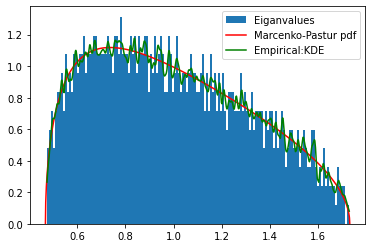

In [41]:
N = 1000
T = 10000
x = np.random.normal(0, 1, size = (T, N))
cor_random = np.corrcoef(x, rowvar=0) # cor.shape = (1000,1000). If rowvar=1 - row represents a var, with observations in the columns.
eVal0 , eVec0 = getPCA(cor_random) 
pdf0 = mpPDF(1., q=x.shape[0]/float(x.shape[1]), pts=N)
pdf1 = fitKDE(np.diag(eVal0), bWidth=.005) #empirical pdf


# KDE and Marcenko-Pastur, and histogram
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal0), density = True, bins=150, label="Eiganvalues") # Histogram the eigenvalues
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")


#plotting
#plt.yscale('log') ## lOG SCALE
plt.legend(loc="upper right")
plt.show()

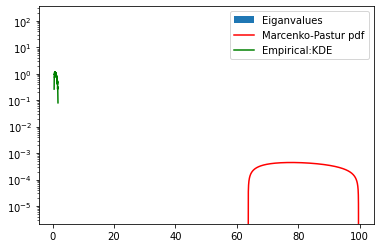

In [42]:
N = len(corr)
T = len(returns_df)
Q = T/N
#cor = ... rewrite it here


#get eigendecomposition
eVal0 , eVec0 = getPCA( corr ) 
#pdf1 = fitKDE(np.diag(eVal0), bWidth=.005) #empirical pdf
pdf0 = mpPDF(1., Q, pts=N)


# KDE and Marcenko-Pastur, and histogram
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal0), density = True, bins=150, label="Eiganvalues") # Histogram the eigenvalues
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")


#plotting
plt.yscale('log') 
#plt.xscale('log')
plt.legend(loc="upper right")
plt.show()

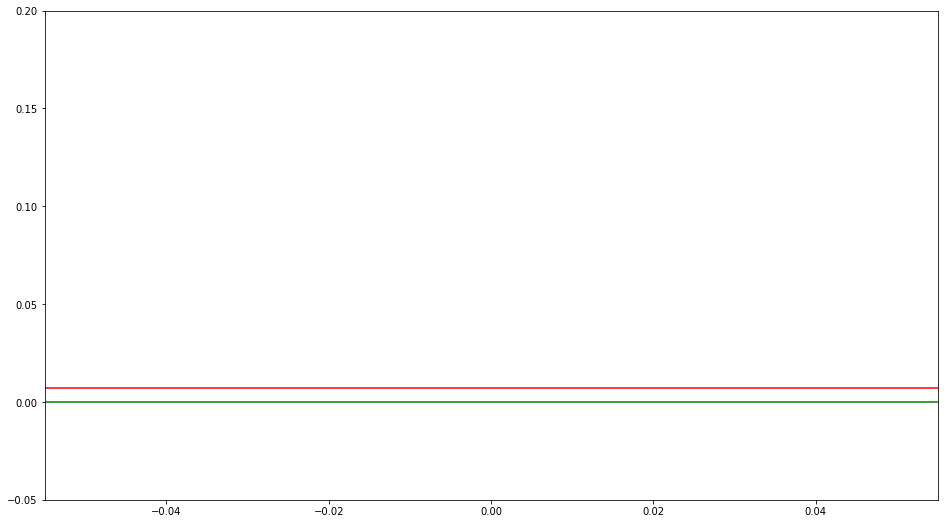

In [44]:
eVal , eVec = getPCA( corr ) 

# First mode 
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(eVec[:, -1].flatten())
ax.axhline(0, c="green")
ax.axhline([1 / (len(corr))**0.5], c="red")
ax.set_ylim(-0.05, 0.2)
plt.show()

One common approach to handle the missing data is to impute the missing values in the correlation matrix. Imputation is the process of replacing missing values with estimated values. There are several methods for imputing missing data, such as mean imputation, median imputation, regression imputation, or k-nearest neighbor imputation.

In [47]:
eVal0 
eVec0 
# imputations methods?

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [32]:
'''
MADE BY LUCA
data = [
   ["a"] * 10 + ["b"]*10  + ["c"]*10,
    list(range(10)) * 3,
    np.random.random(30)
] 
test = pd.DataFrame(data).T
test.columns = ["gvkey", "date", "data"]
display(test)
"""
test = test.set_index(["date", "gvkey"])

test = test.unstack(1).droplevel(0, axis=1)

test
"""

def compute_growthrate(x):
    return np.log(x, .5)

test.groupby("gvkey")["data"].transform(lambda x: compute_growthrate(x))

'''

'\nMADE BY LUCA\ndata = [\n   ["a"] * 10 + ["b"]*10  + ["c"]*10,\n    list(range(10)) * 3,\n    np.random.random(30)\n] \ntest = pd.DataFrame(data).T\ntest.columns = ["gvkey", "date", "data"]\ndisplay(test)\n"""\ntest = test.set_index(["date", "gvkey"])\n\ntest = test.unstack(1).droplevel(0, axis=1)\n\ntest\n"""\n\ndef compute_growthrate(x):\n    return np.log(x, .5)\n\ntest.groupby("gvkey")["data"].transform(lambda x: compute_growthrate(x))\n\n'

https://www.roelpeters.be/solve-pandas-valueerror-cannot-reindex-from-a-duplicate-axis/